# Import environment

In [1]:
import numpy as np 
import pandas as pd
import spacy
from matplotlib import pyplot as plt
import seaborn as sns
from gensim import corpora, models, similarities
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import warnings
import wget
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


# Cleaning data

In [2]:
df = pd.read_csv("C:/Users/Admin/Desktop/Business Project/Olympics-ALL-PARS.csv", header = None, error_bad_lines=False)

b'Skipping line 5: expected 3 fields, saw 9\nSkipping line 37: expected 3 fields, saw 5\nSkipping line 41: expected 3 fields, saw 5\nSkipping line 81: expected 3 fields, saw 5\nSkipping line 106: expected 3 fields, saw 5\nSkipping line 107: expected 3 fields, saw 7\nSkipping line 108: expected 3 fields, saw 5\nSkipping line 112: expected 3 fields, saw 5\nSkipping line 126: expected 3 fields, saw 5\nSkipping line 127: expected 3 fields, saw 5\nSkipping line 139: expected 3 fields, saw 5\nSkipping line 140: expected 3 fields, saw 5\nSkipping line 142: expected 3 fields, saw 5\nSkipping line 149: expected 3 fields, saw 5\nSkipping line 162: expected 3 fields, saw 5\nSkipping line 163: expected 3 fields, saw 5\nSkipping line 186: expected 3 fields, saw 5\nSkipping line 188: expected 3 fields, saw 5\nSkipping line 190: expected 3 fields, saw 5\nSkipping line 191: expected 3 fields, saw 5\nSkipping line 194: expected 3 fields, saw 5\nSkipping line 213: expected 3 fields, saw 5\nSkipping line

In [3]:
df.shape

(22764, 3)

In [4]:
df.head()

,0,1,2
0,1,Olympics-All-PARS/NewChunk1/Examination_of_Wit...,Examination of Witnesses
1,2,Olympics-All-PARS/NewChunk1/Examination_of_Wit...,SEPTEMBER
2,3,Olympics-All-PARS/NewChunk1/Examination_of_Wit...,MS BARBARA CASSANI
3,4,Olympics-All-PARS/NewChunk1/Examination_of_Wit...,Q Chairman Good morning Ms Cassani I should ve...
4,9,Olympics-All-PARS/NewChunk1/Examination_of_Wit...,Q Chairman May I say that we have a lot of mem...


In [5]:
texts = df[2]

In [6]:
stopwords = stopwords.words("english")
new_stopwords = ["would","could","take","make","give"]
for i in new_stopwords:
    stopwords.append(i)

In [7]:
def lemmatisation(text, allowed_postages=["NOUN","ADJ","VERB","ADV"]):
    nlp = spacy.load("en_core_web_sm",disable=["parser","ner"])
    text_out=[ ]
    doc = nlp(text)
    for token in doc:
        if token.pos_ in allowed_postages:
            text_out.append(token.lemma_)
    return (text_out)

In [8]:
de = [ ]
for x in range(0,len(texts)):
    if len(texts[x]) > 1000000:
        de.append(x)
for x in de:
    print(x,len(texts[x]),sep = ":")

# Some Documents Exceed the Maximum Capacity of spacy library, which is 10^6. Problem solved with two loop.

In [9]:
for x in de:
    if len(texts[x]) > 1000000:
        str_surplus = texts[x][1000000:len(texts[x])]
        texts = texts.append(pd.Series(str_surplus,index=[len(texts)]))
        texts[x]=texts[x][0:1000000]
        for i in range(0,len(texts)):
            if len(texts[i]) > 1000000:
                de.append(i)

In [10]:
%%time
lemma_list=[]
for text in texts:
    lemma=lemmatisation(text)
    lemma_list.append(lemma)

Wall time: 4h 23min 17s


# Remove stopwords and words that length less than or equal to 3

In [11]:
final=[]
for l in lemma_list:
    temp = []
    for w in l:
        if w not in stopwords and len(w)>3:
            temp.append(w)
    final.append(temp)

# Bigrams and Trigrams

In [12]:
bigrams_phrase = gensim.models.Phrases(final, min_count = 3, threshold=50)
trigram_phrase = gensim.models.Phrases(bigrams_phrase[final], threshold=50)

bigram = gensim.models.phrases.Phraser(bigrams_phrase)
trigram = gensim.models.phrases.Phraser(trigram_phrase)

data_bigrams = []
for doc in final:
    data_bigrams.append(bigram[doc])  

data_trigrams = []
for doc in data_bigrams:
    data_trigrams.append(trigram[bigram[doc]]) 

# Tf-Idf Model

In [13]:
'''from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_trigrams)
id2word.filter_extremes(no_below=2, no_above=0.85)
corpus = [id2word.doc2bow(text) for text in data_trigrams]
tfidf = TfidfModel(corpus , id2word=id2word)

low_value = 0.03
words = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] 
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids]
    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  
    corpus[i] = new_bow'''

'from gensim.models import TfidfModel\n\nid2word = corpora.Dictionary(data_trigrams)\nid2word.filter_extremes(no_below=2, no_above=0.85)\ncorpus = [id2word.doc2bow(text) for text in data_trigrams]\ntfidf = TfidfModel(corpus , id2word=id2word)\n\nlow_value = 0.03\nwords = []\nwords_missing_in_tfidf = []\nfor i in range(0, len(corpus)):\n    bow = corpus[i]\n    low_value_words = [] \n    tfidf_ids = [id for id, value in tfidf[bow]]\n    bow_ids = [id for id, value in bow]\n    low_value_words = [id for id, value in tfidf[bow] if value < low_value]\n    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids]\n    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  \n    corpus[i] = new_bow'

# Bag of Words

In [14]:
id2word = corpora.Dictionary(data_trigrams)
id2word.filter_extremes(no_below=2, no_above=0.85)

corpus = []
for text in data_trigrams:
    new = id2word.doc2bow(text)
    corpus.append(new)
    
print(corpus[0][0:20])

[(0, 1)]


# LDA modelling

In [15]:
%%time
num_topics = 6
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                           id2word = id2word,
                                           num_topics = num_topics,
                                           random_state = 42,
                                           update_every = 1,
                                           chunksize = 100,
                                           passes = 10,
                                           alpha = 1/num_topics,
                                           eta = 0.01,
                                           minimum_probability=0.0)

Wall time: 47.1 s


# Visualisation

In [16]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word, mds="pcoa")
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.160767 -0.161686       1        1  28.274404
4     -0.195893 -0.140339       2        1  23.443394
3      0.051264 -0.113727       3        1  20.576497
0      0.161630 -0.105130       4        1  10.405539
5      0.338008  0.132484       5        1   9.298167
1     -0.194242  0.388398       6        1   8.001999, topic_info=        Term         Freq        Total Category  logprob  loglift
82     sport  6587.000000  6587.000000  Default  30.0000  30.0000
30    report  3784.000000  3784.000000  Default  29.0000  29.0000
485    venue  3753.000000  3753.000000  Default  28.0000  28.0000
153    event  2887.000000  2887.000000  Default  27.0000  27.0000
614  include  2918.000000  2918.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
60   athlete   566.537559  1111.413711   Topic6  -3.7646   1.8516
4      bring   320.894262  1169.881679   Topic6  -4.3331   1.2319
13      good   366.944761  1793.216132   Topic6  -4.1990   0.9389
365    place   350.761611  1696.019224   Topic6  -4.2441   0.9495
531  country   246.052720   619.278528   Topic6  -4.5986   1.6025

[272 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
141       6  0.999866  absolutely
416       3  0.999960      accept
621       1  0.171547    activity
621       3  0.828924    activity
445       4  1.001536      actual
...     ...       ...         ...
106       5  0.130811        work
93        6  1.000457       world
340       1  0.999988       write
564       1  0.895470        year
564       3  0.104580        year

[294 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 4, 1, 6, 2])

# Take a look at topic distribution of each document

In [17]:
lda_model[corpus[168]]

[(0, 0.06104692),
 (1, 0.07941071),
 (2, 0.3252417),
 (3, 0.15340093),
 (4, 0.35894522),
 (5, 0.021954507)]

In [18]:
df2 = pd.DataFrame()
for i in range(len(df)):
    trans = []
    for order, value in lda_model[corpus[i]]:
        trans.append([order,value])
    df2=df2.append(pd.DataFrame(trans,columns=['Topic',i+1]).T.drop('Topic',axis=0))
df2.columns.name='Topics'
df2.index.name='Document'
df2.head()

Topics,0,1,2,3,4,5
Document,,,,,,
1,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
2,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
3,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
4,0.004288,0.036934,0.485879,0.004293,0.284887,0.183718
5,0.012821,0.012821,0.690347,0.012821,0.181446,0.089742


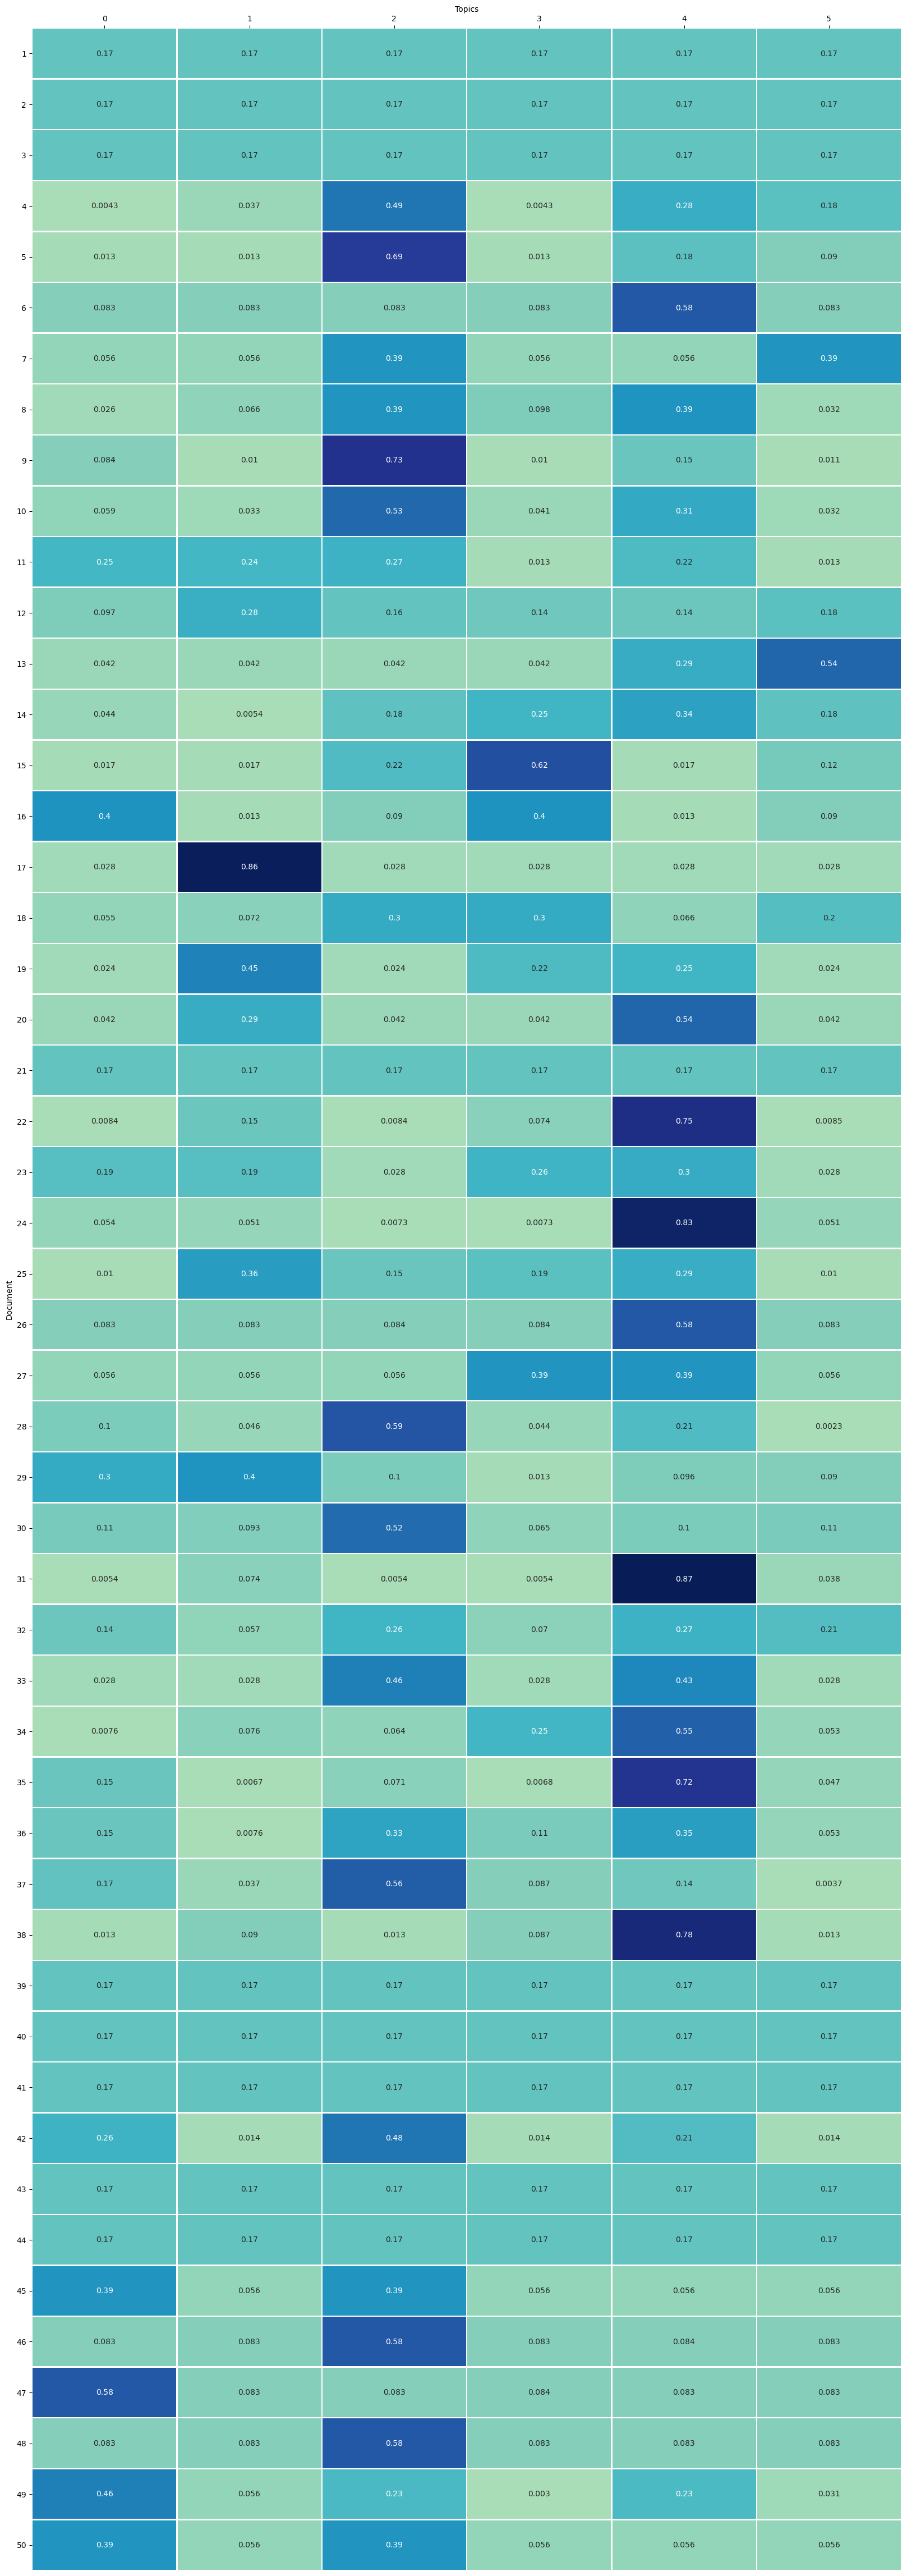

In [22]:
# Heatmap of topic distribution for first 20 documents

plt.figure(figsize=(20,60),dpi=100)
ax = sns.heatmap(data=df2[0:50],linecolor='white',cbar=False,annot=True,linewidths=1,cmap="YlGnBu",center=0.25)
plt.yticks(rotation = 0)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.show()

# Take a look at document distribution for each topic

In [20]:
all_topics = lda_model.print_topics()
docs_per_topic = [[] for _ in all_topics]

for doc_id, doc_bow in enumerate(corpus):
    doc_topics = lda_model.get_document_topics(doc_bow)
    for topic_id, score in doc_topics:
        docs_per_topic[topic_id].append((doc_id, score))

In [23]:
# Highest N ranked paragraphs for topic K 
N = 15
topics = []
for K in range(len(lda_model.print_topics())):
    trans = []
    for order, value in docs_per_topic[K]:
        trans.append([order,value])
        df3=pd.DataFrame(trans,columns=['Document','Value']).sort_values(by = 'Value',ascending=False,).head(N).set_index('Document')
    topics.append(df3)

# Lets see highest 15 ranked documents for topic 9
topics[2]

,Value
Document,
7069,0.935671
2589,0.935633
6368,0.930245
13684,0.924210
5133,0.916580
20636,0.916542
12806,0.916460
4301,0.906332
5381,0.895806


In [24]:
# Highest N ranked paragraphs where the belong() function is greater than the threshold for M topics at a time

def show_paragraph_above_threshold(topic_num, threshold):
    trans = []
    for order, value in docs_per_topic[topic_num]:
        trans.append([order,value])
        df3=pd.DataFrame(trans,columns=['Document','Value']).sort_values(by = 'Value',ascending=False,).set_index('Document')
        df3=df3[df3['Value']>threshold]
    return df3

show_paragraph_above_threshold(2, 0.6)

,Value
Document,
7069,0.935671
2589,0.935633
6368,0.930245
13684,0.924210
5133,0.916580
...,...
22089,0.600677
20023,0.600581
10805,0.600289


In [25]:
# Compute Perplexity
print('Perplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_trigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Perplexity:  -56.62385138618148

Coherence Score:  0.5654285759240395
